# More quantopian examples #
#### Group filters; Classifer with sector code; Masking filters; factors;
#### run_pipeline for testing make_pipeline in notebook; using initialize and schedule_function for IDE backtesting;
#### Leverage, $ Leverage Ratio = \frac{Debt + Capital Base}{Capital Base}$ , and Exposure
#### Run Full Backtest and get_backtest
#### Hedging (The lecturer did not explain it well and the example seems incomplete)
#### pyfolio, empyrical modules and tear_sheet plots
#### [Fama-French 3-factor model](https://www.bogleheads.org/wiki/Fama_and_French_three-factor_model) , and [Momentum](https://www.fxcm.com/insights/what-is-momentum-trading/)
#### Drawdown and underwater plots, etc.


____________________________
# Before work in IDE, test the code in quantopian notebook first ##

In [1]:
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.pipeline.data import morningstar
from quantopian.pipeline.filters import Q1500US
from quantopian.pipeline.factors import SimpleMovingAverage, AverageDollarVolume

In [2]:
def make_pipeline():
    # Base universe filter (group filter)
    base_universe = Q1500US()
    
    # Sector classification as filter 
    
    # Masking Base Energy Stocks
    sector = morningstar.asset_classification.morningstar_sector_code.latest
    energy_sector = sector.eq(309)    
    base_energy = base_universe & energy_sector
    
    # Dollar volume factor
    dollar_volume = AverageDollarVolume(window_length=30)
    
     # Top half of dollar volume filter
    high_dollar_volume = dollar_volume.percentile_between(95,100)
    
    # Final Filter Mask
    top_half_base_energy = base_energy & high_dollar_volume
    
    # 10-day close price average.
    mean_10 = SimpleMovingAverage(inputs=[USEquityPricing.close], window_length=10, mask=top_half_base_energy)

    # 30-day close price average.
    mean_30 = SimpleMovingAverage(inputs=[USEquityPricing.close], window_length=30, mask=top_half_base_energy)

    # Percent difference factor.
    percent_difference = (mean_10 - mean_30) / mean_30
    
    # Create a filter to select securities to short. Should it be revrsed: shorts=percent_difference>0 ?
    shorts = percent_difference < 0
    
    # Create a filter to select securities to long. Should it be revrsed: longs=percent_difference<0 ?
    longs = percent_difference > 0
    
    # Filter for the securities that we want to trade.
    securities_to_trade = (shorts | longs)
    
    return Pipeline(columns = {
        'longs':longs,
        'shorts':shorts,
        'percent_diff':percent_difference
    }, screen=securities_to_trade)

In [3]:
results = run_pipeline(make_pipeline(), '2015-05-05', '2015-05-05')
results

longs  percent_diff shorts
2015-05-05 00:00:00+00:00 Equity(216 [HES])     True      0.036528  False
                          Equity(448 [APA])     True      0.035926  False
                          Equity(455 [APC])     True      0.049153  False
                          Equity(858 [BHI])     True      0.033807  False
                          Equity(1746 [COG])    True      0.058078  False
                          Equity(2368 [DVN])    True      0.046264  False
                          Equity(2564 [EOG])    True      0.032102  False
                          Equity(2621 [ESV])    True      0.060197  False
                          Equity(3443 [HAL])    True      0.049257  False
                          Equity(3647 [HP])     True      0.040991  False
                          Equity(5035 [MRO])    True      0.061598  False
                          Equity(5213 [NBL])    True      0.010443  False
                          Equity(5214 [NBR])    True      0.064133  False
                          Equity(5249 [NE])     True      0.037559  False
                          Equity(5729 [OXY])    True      0.029776  False
                          Equity(6928 [SLB])    True      0.046555  False
                          Equity(7244 [SWN])    True      0.070788  False
                          Equity(7612 [ANDV])   True      0.005997  False
                          Equity(7990 [VLO])   False     -0.017145   True
                          Equity(8214 [WMB])    True      0.018876  False
                          Equity(8347 [XOM])    True      0.017343  False
                          Equity(8461 [CHK])    True      0.014265  False
                          Equity(9038 [RIG])    True      0.048180  False
                          Equity(13176 [CAM])   True      0.082110  False
                          Equity(17436 [PXD])   True      0.010248  False
                          Equity(19249 [RRC])   True      0.087062  False
                          Equity(19336 [WFT])   True      0.049141  False
                          Equity(22784 [FTI])   True      0.054529  False
                          Equity(23112 [CVX])   True      0.018972  False
                          Equity(23998 [COP])   True      0.023902  False
                          Equity(24809 [NOV])   True      0.024940  False
                          Equity(25707 [WLL])   True      0.048205  False
                          Equity(33856 [CLR])   True      0.064304  False
                          Equity(34440 [CXO])   True      0.042184  False
                          Equity(39797 [OAS])   True      0.042388  False
                          Equity(40852 [KMI])   True      0.023016  False
                          Equity(41636 [MPC])   True      0.011952  False
                          Equity(42788 [PSX])   True      0.020911  False

In [4]:
results.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 38 entries, (2015-05-05 00:00:00+00:00, Equity(216 [HES])) to (2015-05-05 00:00:00+00:00, Equity(42788 [PSX]))
Data columns (total 3 columns):
longs           38 non-null bool
percent_diff    38 non-null float64
shorts          38 non-null bool
dtypes: bool(2), float64(1)
memory usage: 684.0+ bytes


## To implement above in quantopian IDE ##
Copy of the code to IDE. Add initialize, schedule_function, etc. 
Only to run inside IDE for backtesting <br>
It seems that there are a couple of mistakes inside lecturer's code, but the errors in the lecturer's code make his results better ! <br>
It seems that the shorting makes the portofolio lossing money.

In [ ]:
"""
This is a template algorithm on Quantopian for you to adapt and fill in.
"""
# import quantopian.algorithm as algo
from quantopian.algorithm import attach_pipeline, pipeline_output
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data.builtin import USEquityPricing
# from quantopian.pipeline.filters import QTradableStocksUS
# from quantopian.research import run_pipeline # only available in research, not available in backtester
from quantopian.pipeline.data import morningstar
from quantopian.pipeline.filters import Q1500US
from quantopian.pipeline.factors import SimpleMovingAverage, AverageDollarVolume


def initialize(context):
    """
    Called once at the start of the algorithm.
    """

    schedule_function(my_rebalance, date_rules.week_start(), time_rules.market_open(hours=1))
                      
    # Create our dynamic stock selector.
    attach_pipeline(make_pipeline(), 'my_pipeline')
                      
def my_rebalance(context,data):
    for security in context.portfolio.positions:
        if security not in context.longs and security not in context.shorts and data.can_trade(security):
            order_target_percent(security,0)
                      
    for security in context.longs:
        if data.can_trade(security):
            order_target_percent(security,context.long_weight)

    for security in context.shorts:
        if data.can_trade(security):
            order_target_percent(security,context.short_weight)


def my_compute_weights(context):
    # to be used by "before_trading_start(context,data)
    if len(context.longs)==0:
        long_weight = 0
    else:
        long_weight = 0.5 / len(context.longs)
  
    if len(context.shorts)==0:
        short_weight = 0
    else:
        short_weight = -0.5 / len(context.shorts)
    
    return (long_weight,short_weight)

                      
def before_trading_start(context,data):
    # build-in method, will be called daily before market starts 
    context.output = pipeline_output('my_pipeline')
    
    # LONG
    context.longs = context.output[context.output['longs']].index.tolist()
    
    # SHORT
    context.shorts = context.output[context.output['shorts']].index.tolist()


    context.long_weight,context.short_weight = my_compute_weights(context)




def make_pipeline():
    # Base universe filter
    base_universe = Q1500US()
    
    # Sector classification as filter
    sector = morningstar.asset_classification.morningstar_sector_code.latest
    energy_sector = sector.eq(309)
    
    # Masking Base Energy Stocks
    base_energy = base_universe & energy_sector
    
    # Dollar volume factor
    dollar_volume = AverageDollarVolume(window_length=30)
    
     # Top half of dollar volume filter
    high_dollar_volume = dollar_volume.percentile_between(95,100)
    
    # Final Filter Mask
    top_half_base_energy = base_energy & high_dollar_volume
    
    # 10-day close price average.
    mean_10 = SimpleMovingAverage(inputs=[USEquityPricing.close], window_length=10, mask=top_half_base_energy)

    # 30-day close price average.
    mean_30 = SimpleMovingAverage(inputs=[USEquityPricing.close], window_length=30, mask=top_half_base_energy)

    # Percent difference factor.
    percent_difference = (mean_10 - mean_30) / mean_30
    
    # Create a filter to select securities to short. Should it be revrsed: shorts=percent_difference>0 ?
    shorts = percent_difference > 0
    
    # Create a filter to select securities to long. Should it be revrsed: longs=percent_difference<0 ?
    longs = percent_difference < 0
    
    # Filter for the securities that we want to trade.
    securities_to_trade = (shorts | longs)
    
    return Pipeline(columns = {
        'longs':longs,
        'shorts':shorts,
        'percent_diff':percent_difference
    }, screen=securities_to_trade)

________________
# Leverage
#### and set hard limit on Leverage

In [ ]:
def initialize(context):
    context.amzn = sid(16841)
    context.ibm = sid(3766)
    
    schedule_function(rebalance,date_rules.every_day(),time_rules.market_open())
    schedule_function(record_vars,date_rules.every_day(),time_rules.market_close())
    
def rebalance(context,data):
    order_target_percent(context.amzn,0.5)
    order_target_percent(context.ibm,-0.5)
    
def record_vars(context,data):
    record(amzn_close=data.current(context.amzn,'close'))
    record(ibm_close=data.current(context.ibm,'close'))
    record(Leverage = context.account.leverage)
    record(Exposure = context.account.net_leverage)

### Run Full Backtest, then either (a) select "notebook" tab (on "backtest 1" page) to run get_backtest, or (b) run get_backtest in a seperate quantopian notebook with copied full-backtest string. ###
With option (a), the notebook is connected to IDE and I could not find a option to downloade it;  In case (b) the quantopian notebook can be downloded.

100% Time: 0:00:01|###########################################################|


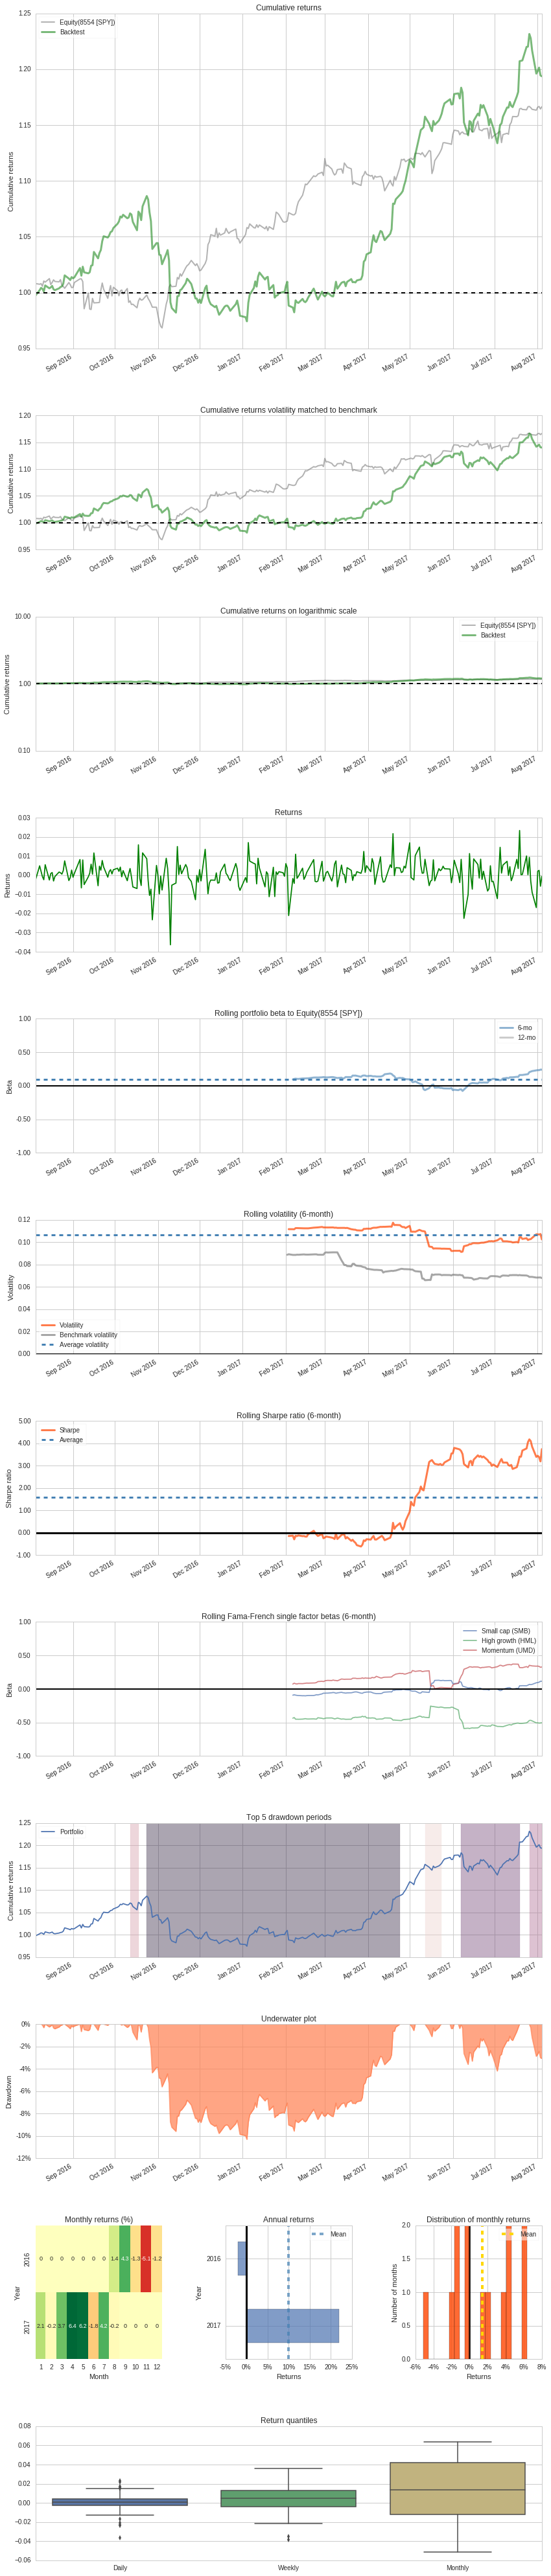

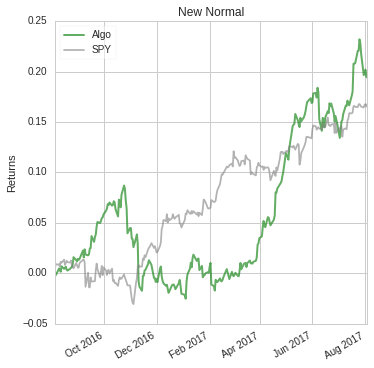

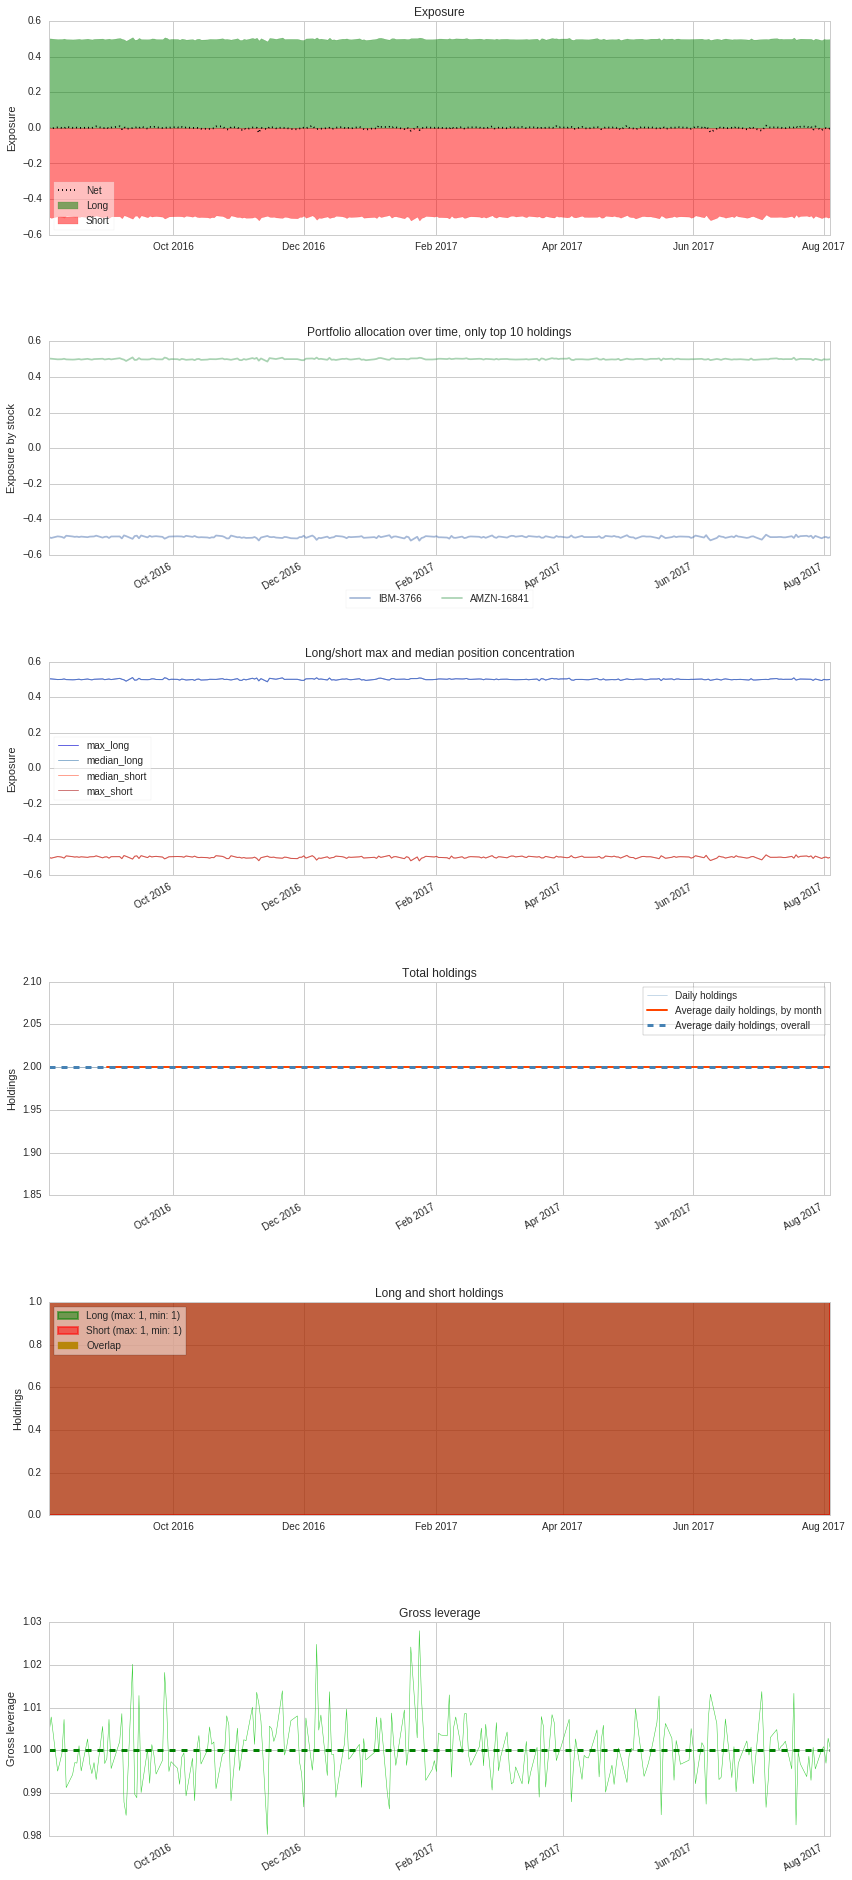

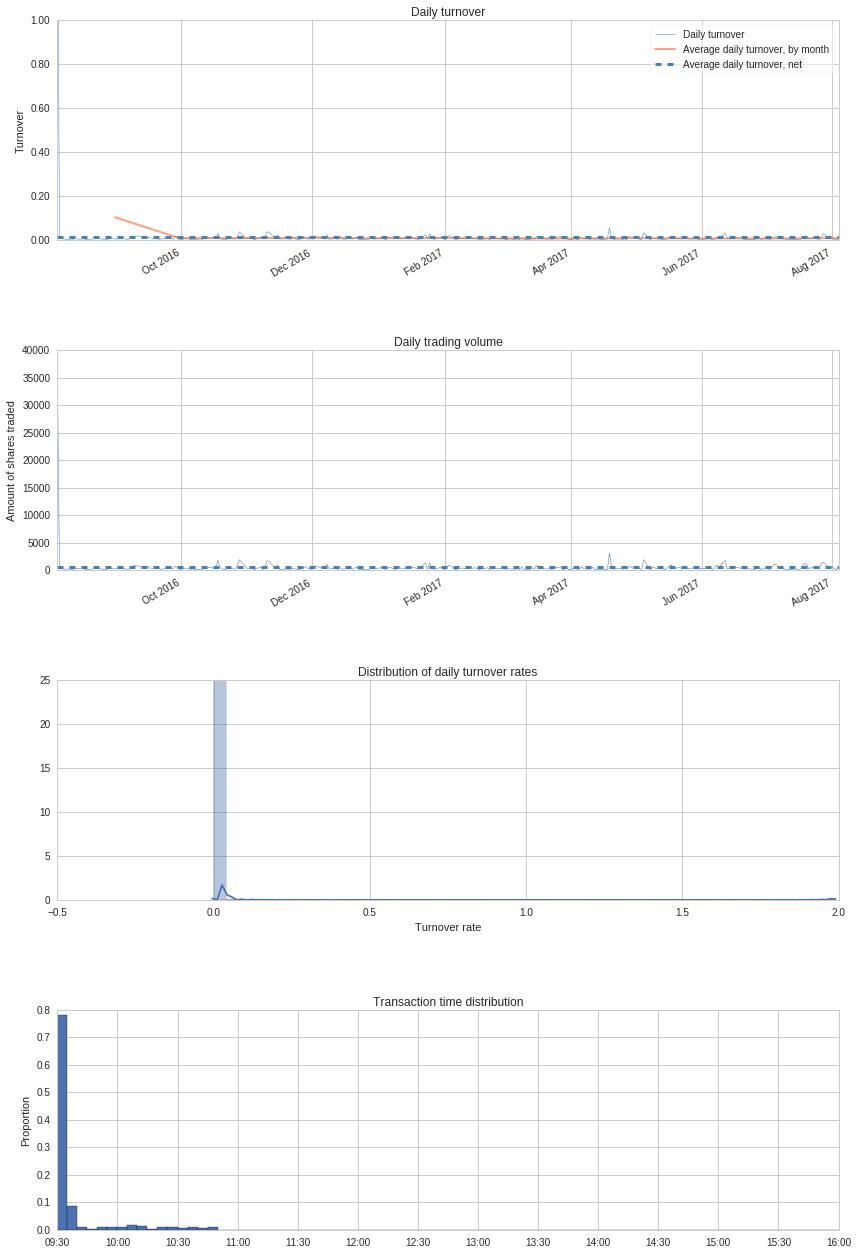

## Performance Relative to Common Risk Factors

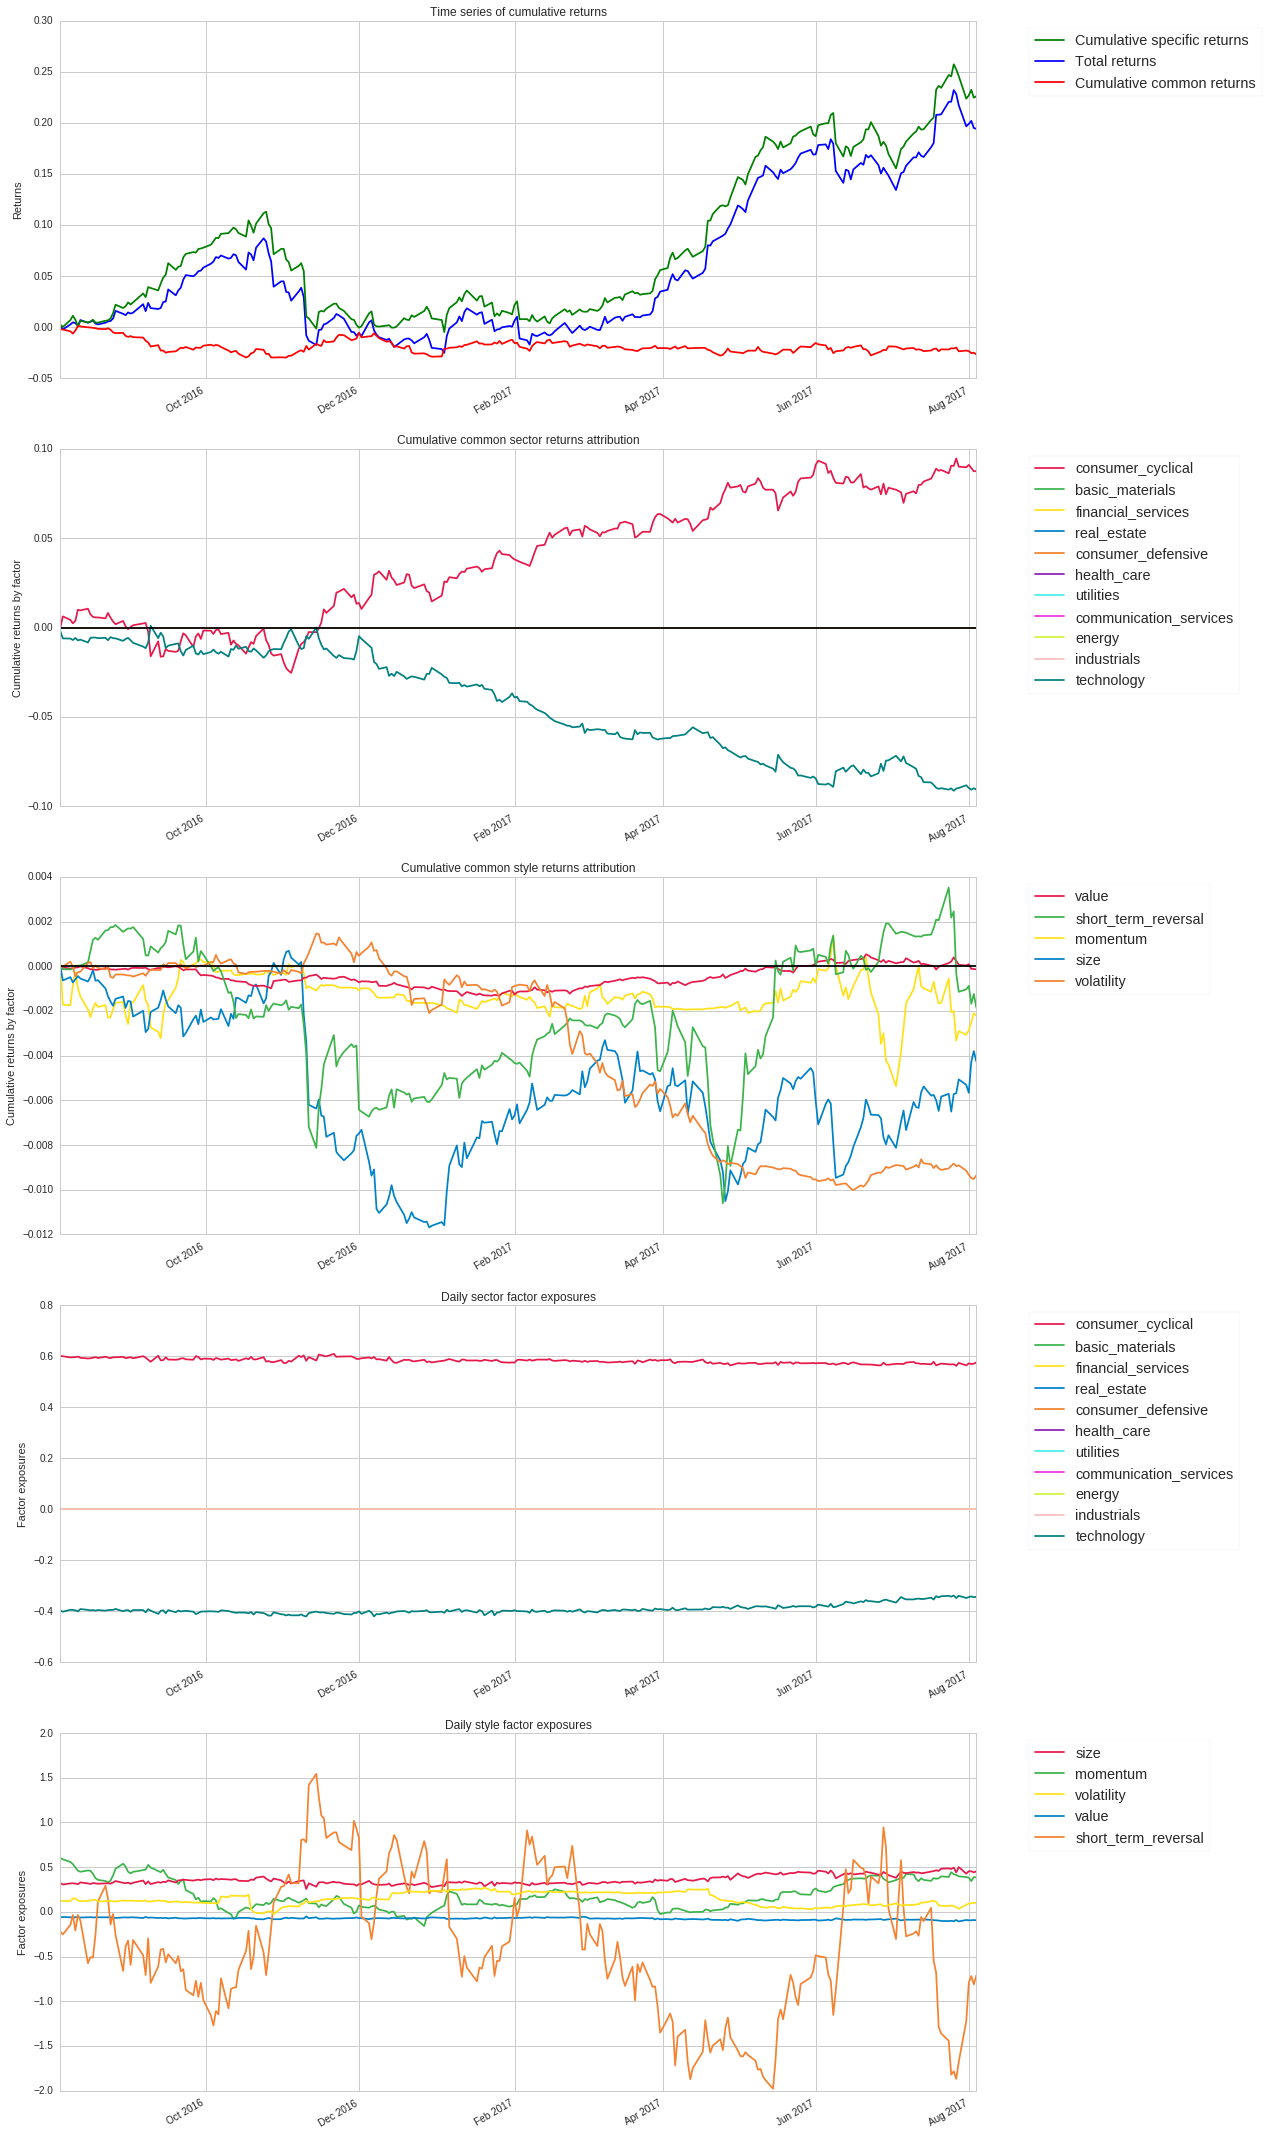

In [6]:
bt = get_backtest('5b9fdb55a9558143e9363c22')
bt.create_full_tear_sheet()

#### Don't know most of othe outputs above. Try to follow some outs in seperate cells as following:

In [7]:
bt.algo_id

'5b9fdb55a9558143e9363c22'

In [8]:
bt.recorded_vars.head()

Exposure  Leverage  amzn_close  ibm_close
2016-08-04 00:00:00+00:00  0.003096  1.003300     760.960     161.41
2016-08-05 00:00:00+00:00 -0.002652  1.007467     765.890     163.45
2016-08-08 00:00:00+00:00  0.002615  0.994985     766.360     162.05
2016-08-09 00:00:00+00:00  0.001590  0.996875     767.705     161.75
2016-08-10 00:00:00+00:00  0.000042  0.998992     768.480     162.02

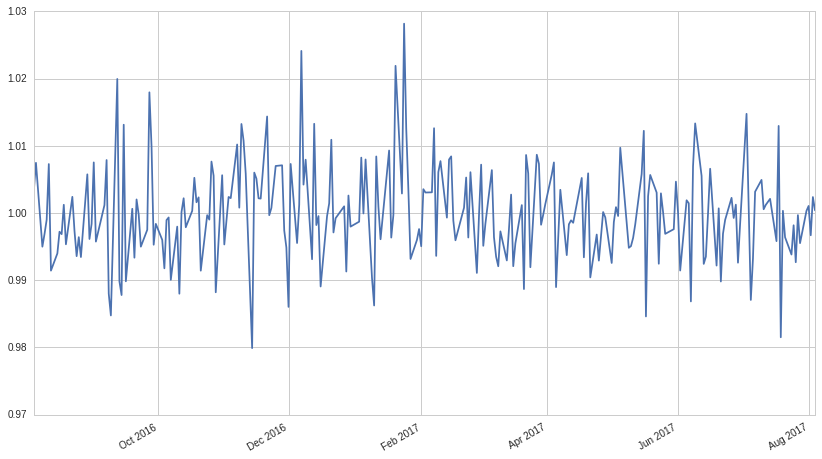

In [9]:
bt.recorded_vars['Leverage'].plot();
# around 1 with small fluctuations

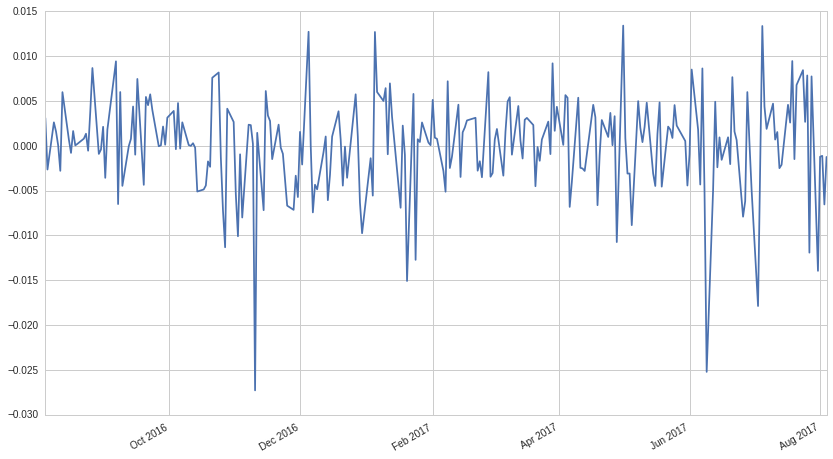

In [10]:
bt.recorded_vars['Exposure'].plot();
# around zero with small fluctuations

In [11]:
print(bt.recorded_vars.__doc__)

 Two-dimensional size-mutable, potentially heterogeneous tabular data
    structure with labeled axes (rows and columns). Arithmetic operations
    align on both row and column labels. Can be thought of as a dict-like
    container for Series objects. The primary pandas data structure

    Parameters
    ----------
    data : numpy ndarray (structured or homogeneous), dict, or DataFrame
        Dict can contain Series, arrays, constants, or list-like objects
    index : Index or array-like
        Index to use for resulting frame. Will default to np.arange(n) if
        no indexing information part of input data and no index provided
    columns : Index or array-like
        Column labels to use for resulting frame. Will default to
        np.arange(n) if no column labels are provided
    dtype : dtype, default None
        Data type to force, otherwise infer
    copy : boolean, default False
        Copy data from inputs. Only affects DataFrame / 2d ndarray input

    Examples
    ---

#  High Leverage Example
modify the target_percentage of above code in IDE, run full backtest, and a "backtest 2" is generaged, with notebook tab and other tabs.

In [ ]:
def initialize(context):
    context.amzn = sid(16841)
    context.ibm = sid(3766)
    
    schedule_function(rebalance,date_rules.every_day(),time_rules.market_open())
    schedule_function(record_vars,date_rules.every_day(),time_rules.market_close())
    
def rebalance(context,data):
    order_target_percent(context.amzn,2)
    order_target_percent(context.ibm,-2)   # very high leverage, very risky
    
def record_vars(context,data):
    record(amzn_close=data.current(context.amzn,'close'))
    record(ibm_close=data.current(context.ibm,'close'))
    record(Leverage = context.account.leverage)
    record(Exposure = context.account.net_leverage)

On "backtest 2" page, click 'notebook' tab, copy and past the cell into this "downloadable" notebook:

100% Time: 0:00:01|###########################################################|


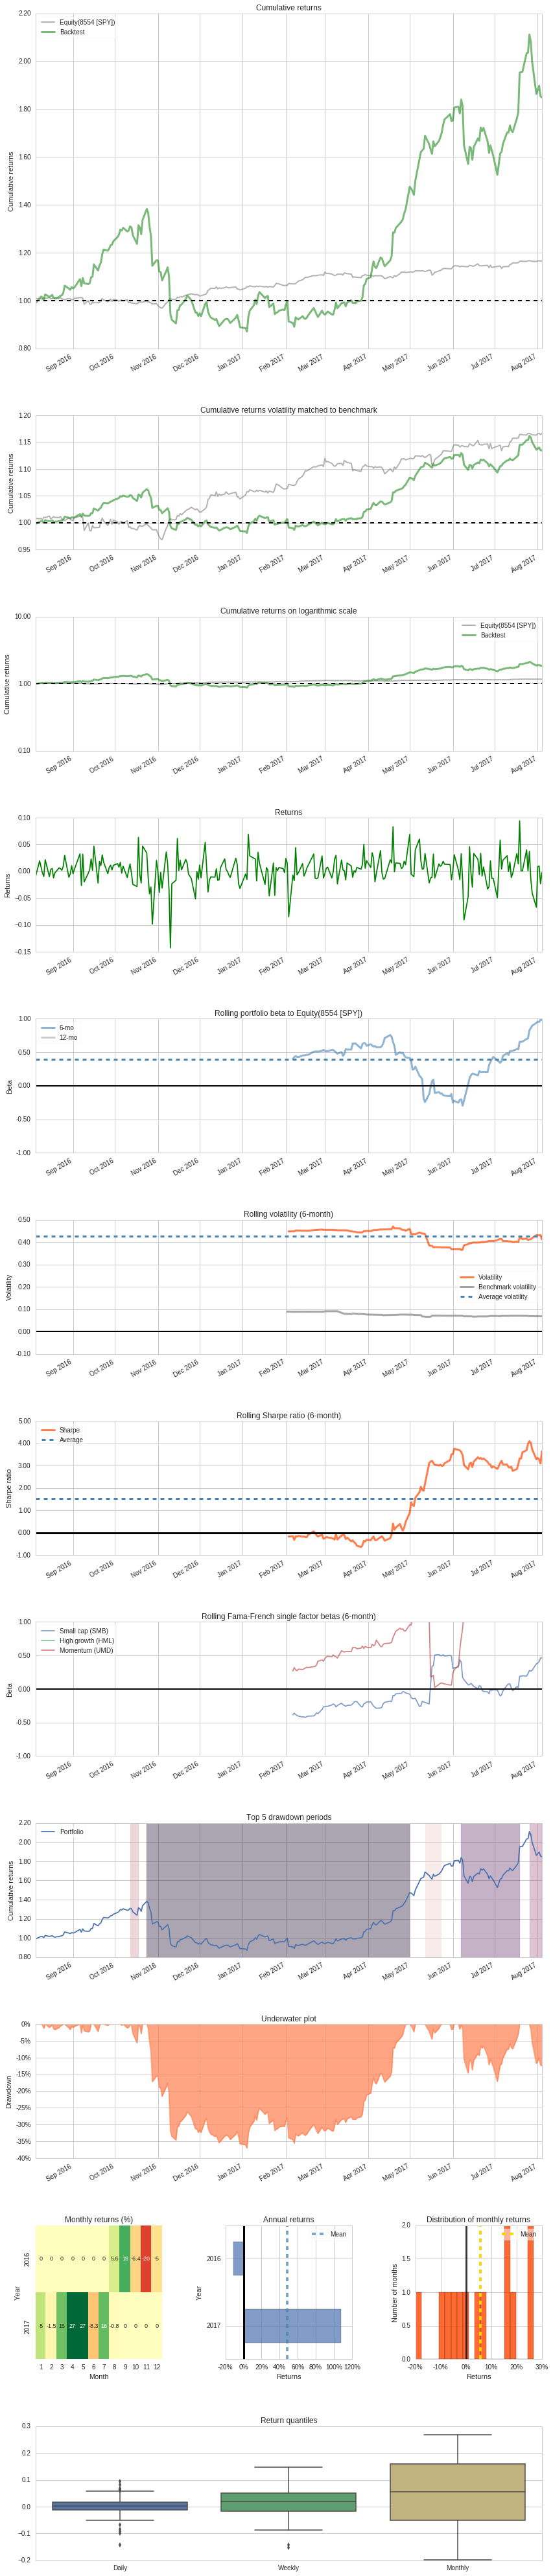

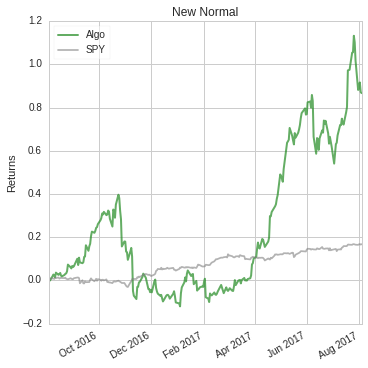

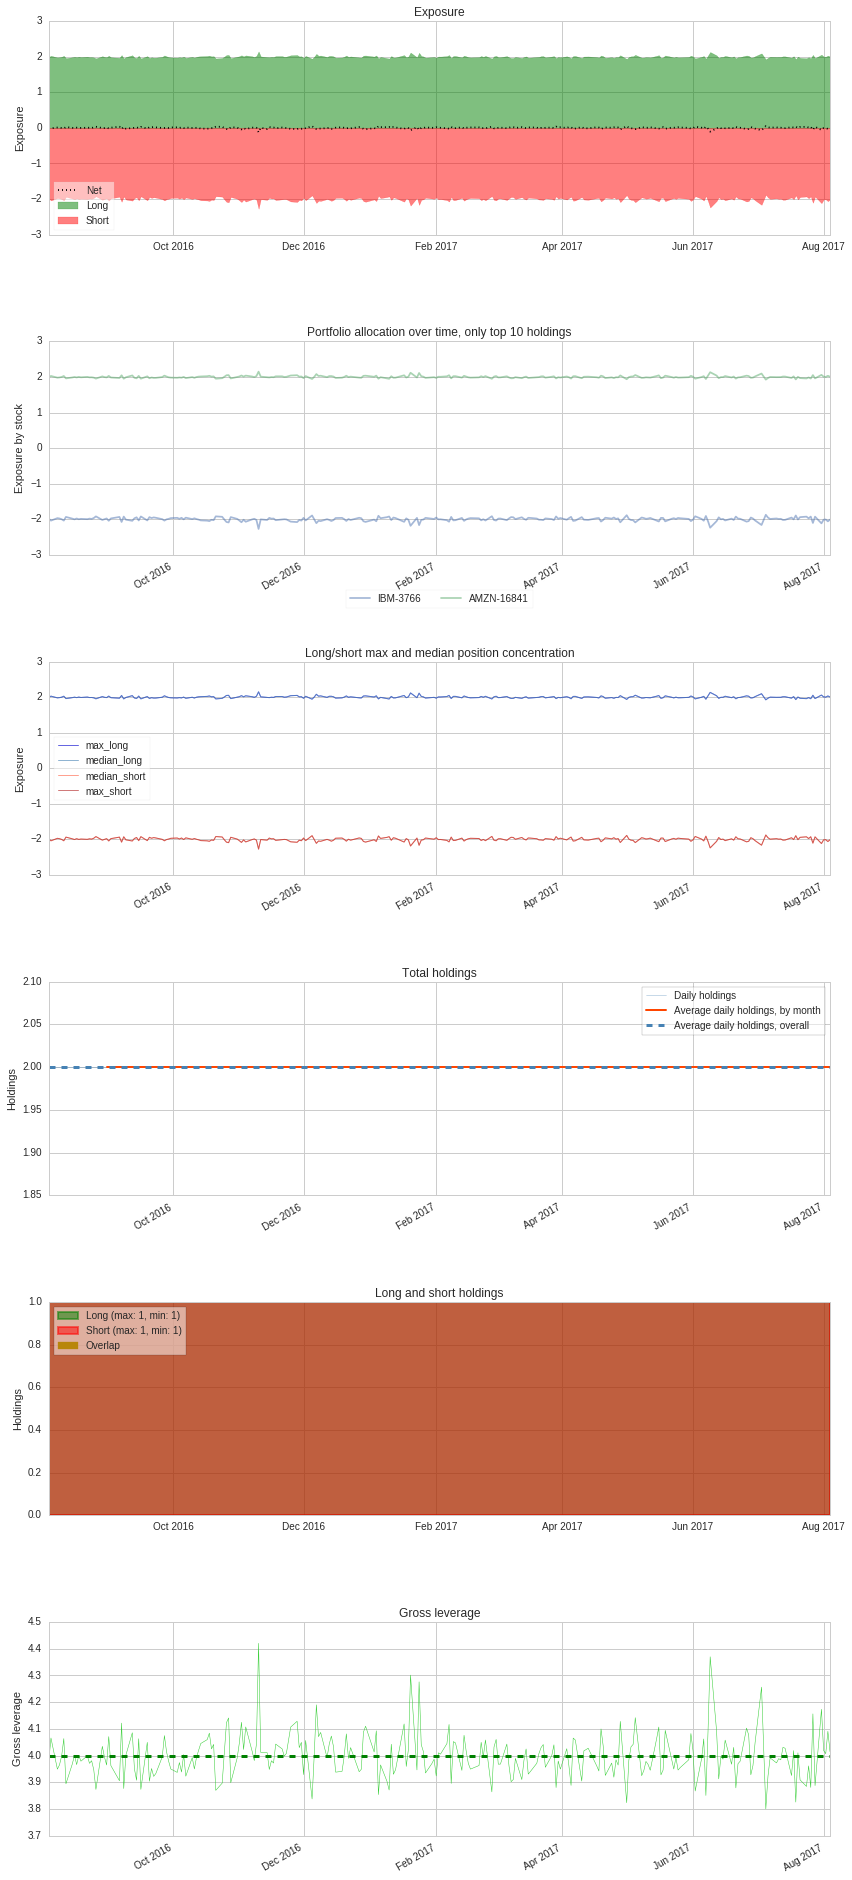

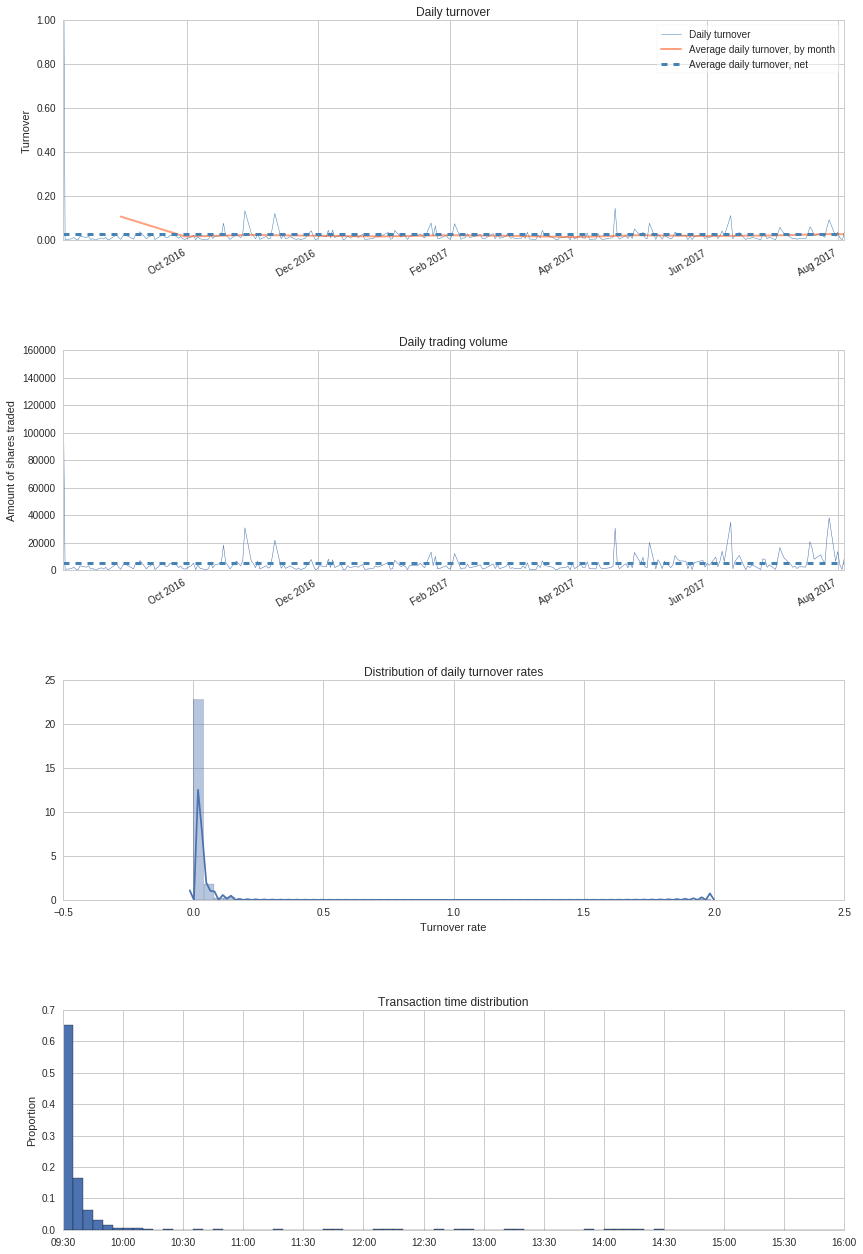

## Performance Relative to Common Risk Factors

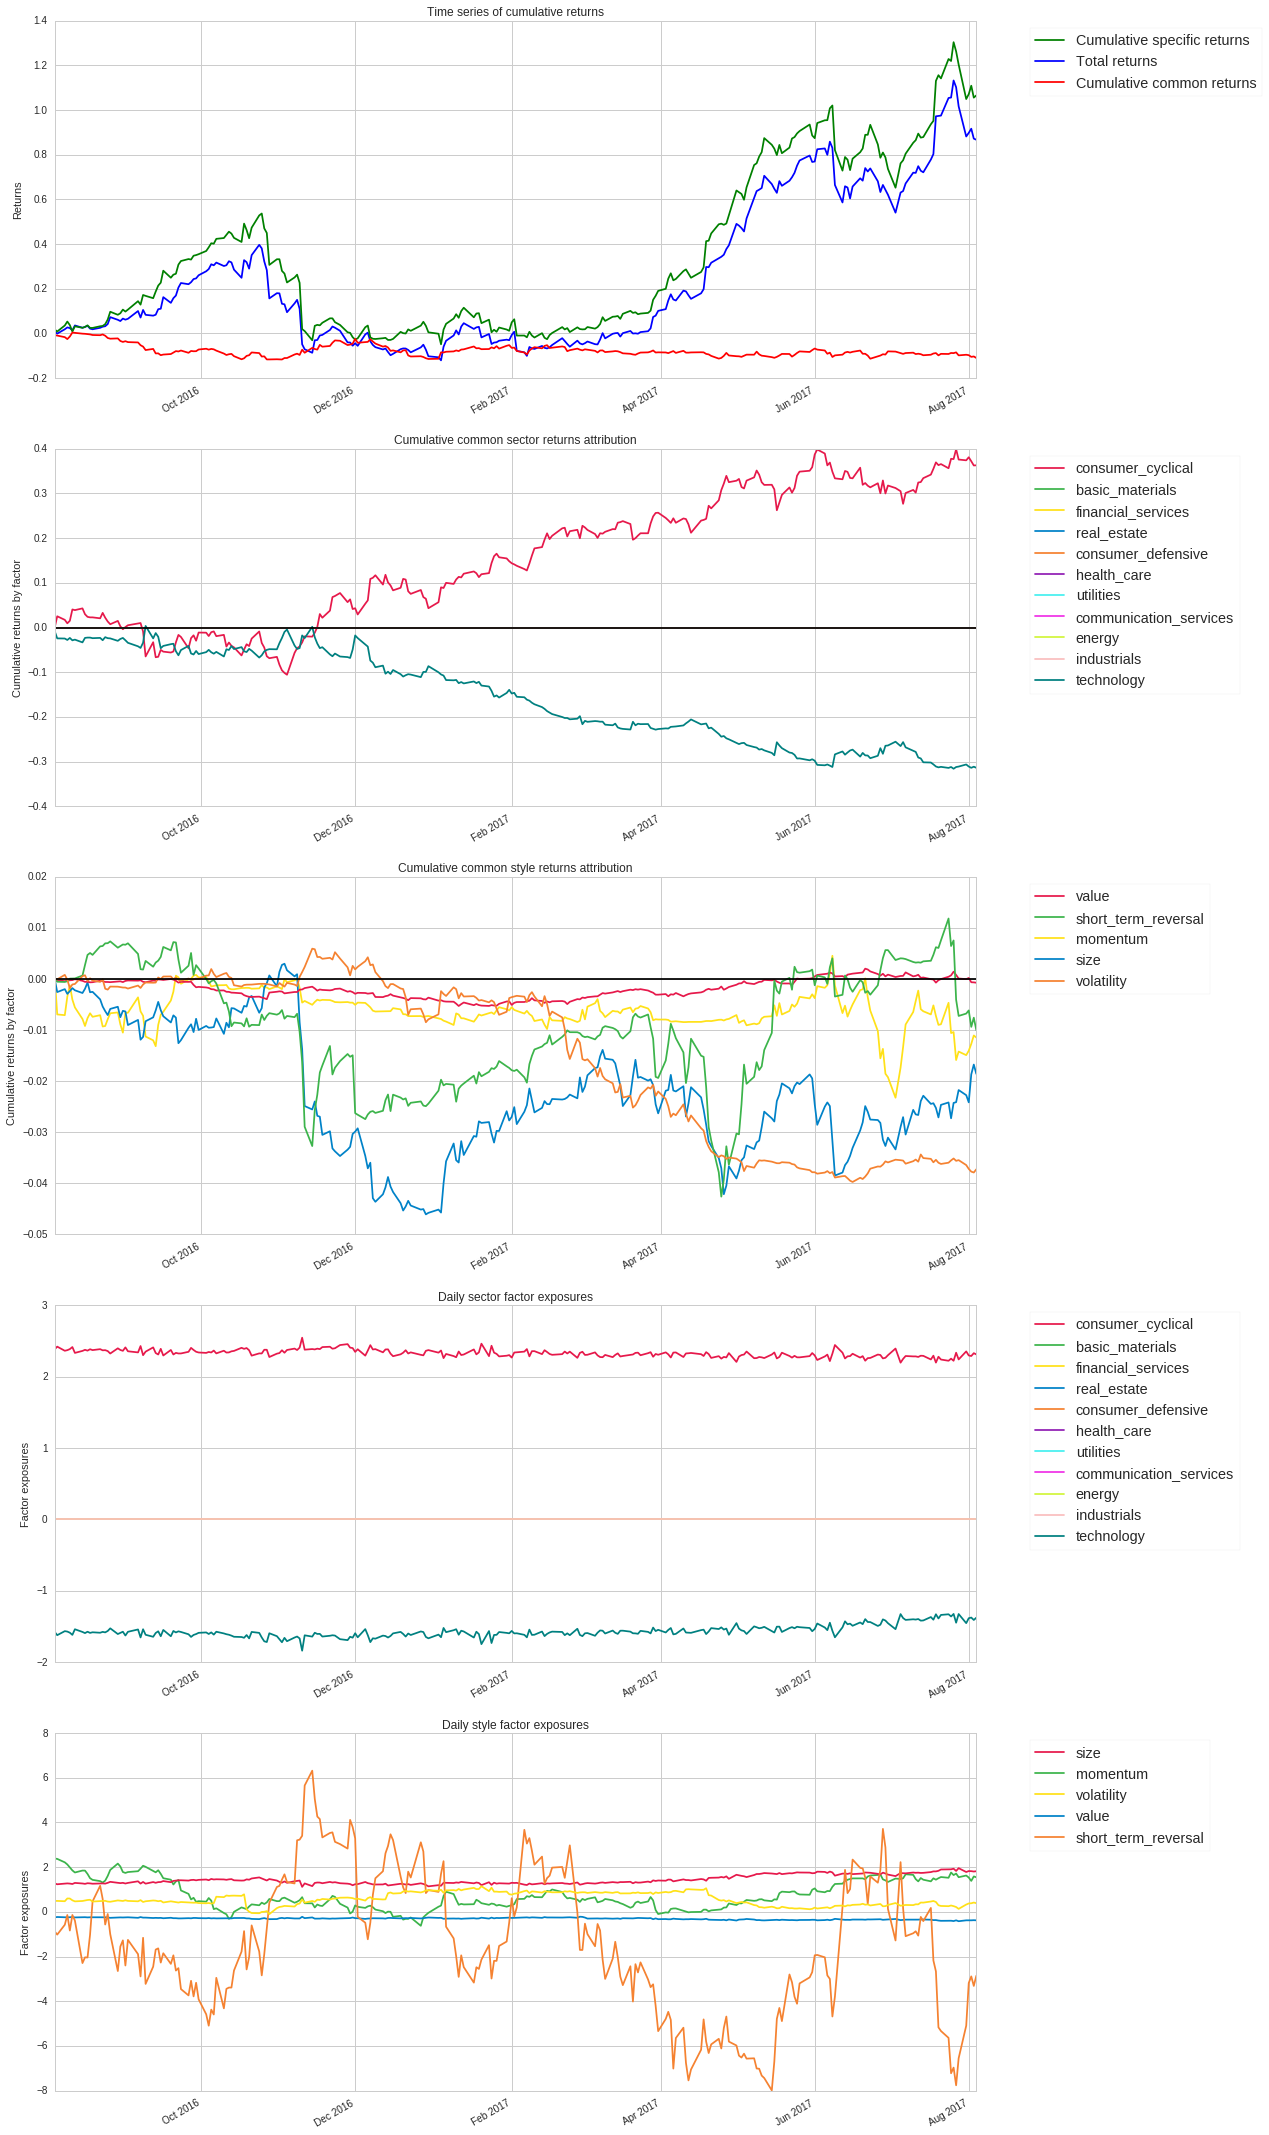

In [12]:
bt = get_backtest('5ba540e973e5814290417ef1')
bt.create_full_tear_sheet()

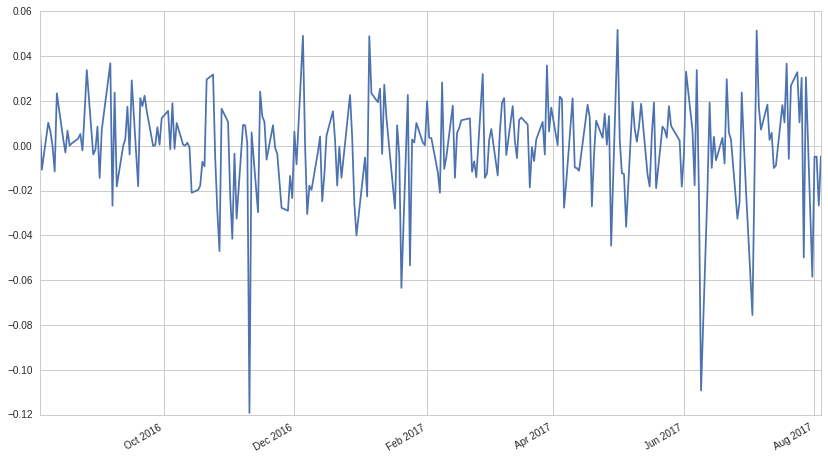

In [13]:
bt.recorded_vars['Exposure'].plot();
# still around zero with small fluctuations, because its long and short about equial

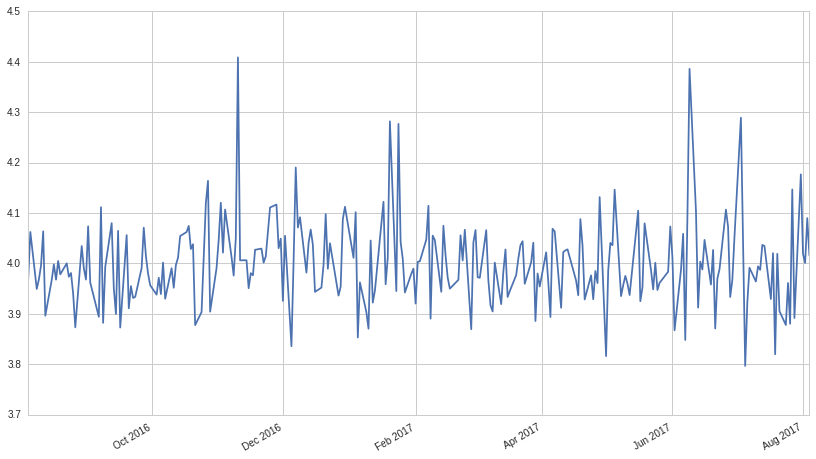

In [14]:
bt.recorded_vars['Leverage'].plot();
# So leverage jumps to 4

# Hedging
<font color='red'> Lecturer said that lower $\beta$ security is preferred because less volatility. However according to CAPM high $\beta$ means high gain if market is going up in general! </font>
* Lecturer's strategy: Hedging only against the $\alpha$, not $\beta$. So it needs to cancel $\beta$ first before hedging

In [15]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [16]:
# Get data for the specified period and stocks
start = '2016-01-01'
end = '2017-01-01'
asset = get_pricing('AAPL', fields='price', start_date=start, end_date=end)
benchmark = get_pricing('SPY', fields='price', start_date=start, end_date=end)

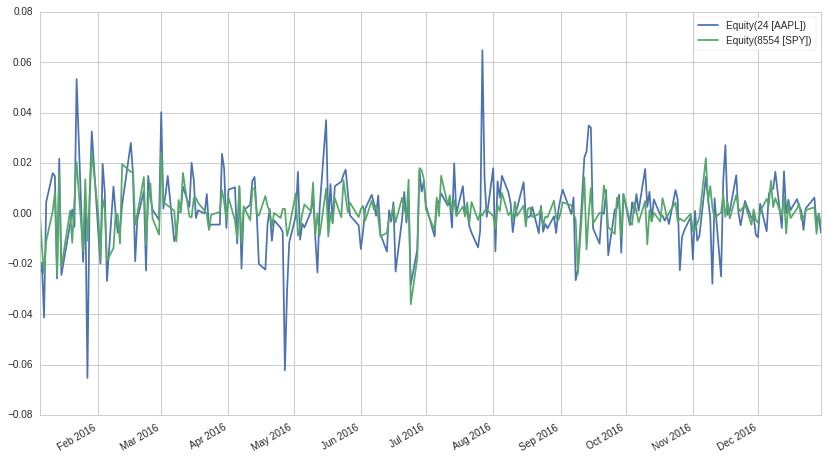

In [17]:
asset_ret = asset.pct_change()[1:]
bench_ret = benchmark.pct_change()[1:]
asset_ret.plot()
bench_ret.plot()
plt.legend();

## Regression for Alpha and Beta Values

In [18]:
print(type(asset))
print(type(asset_ret))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [19]:
AAPL = asset_ret.values
spy = bench_ret.values

# Add a constant (column of 1s for intercept)
spy_constant = sm.add_constant(spy)

# Fit regression to data
model = regression.linear_model.OLS(AAPL,spy_constant).fit()

print('alpha, beta: ', model.params)

('alpha, beta: ', array([  1.67990248e-05,   1.02981370e+00]))


##### plot the data and fitting

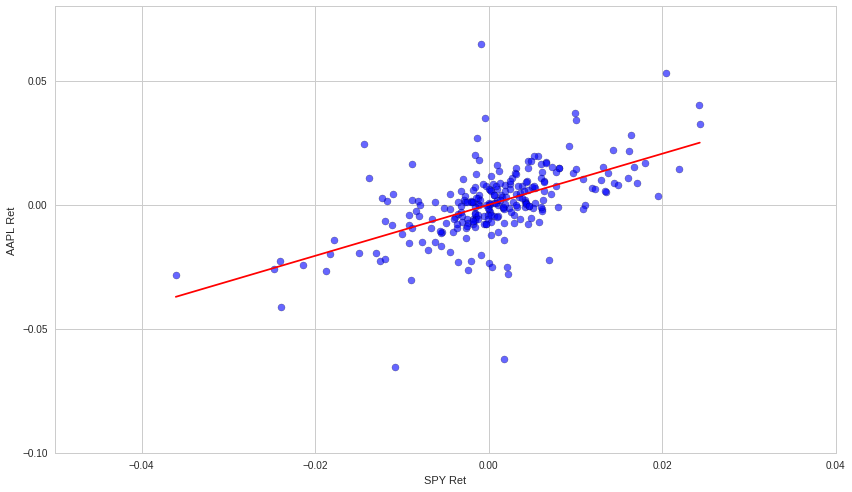

In [20]:
alpha , beta = model.params
# Scatter Returns
plt.scatter(bench_ret,asset_ret,alpha=0.6,s=50)

# Fit Line
min_spy = bench_ret.values.min()
max_spy = bench_ret.values.max()

spy_line = np.linspace(min_spy,max_spy,100)
y = spy_line * beta + alpha

plt.plot(spy_line,y,'r')

plt.xlabel('SPY Ret')
plt.ylabel('AAPL Ret')

## Implementing the Hedge

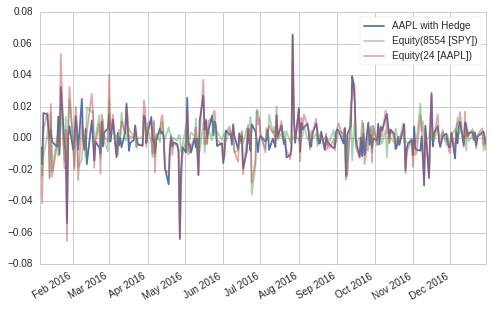

In [21]:
hedged = -1*beta*bench_ret + asset_ret
hedged.plot(label='AAPL with Hedge', figsize=(8,5))
bench_ret.plot(alpha=0.5)
asset_ret.plot(alpha=0.5)
plt.legend()

### Effects of Hedging

In [22]:
def alpha_beta(benchmark_ret,stock):
    benchmark = sm.add_constant(benchmark_ret)
    model = regression.linear_model.OLS(stock,benchmark).fit()
    
    return model.params[0], model.params[1]


# Get the alpha and beta estimates over the last year
start = '2016-01-01'
end = '2017-01-01'

asset2016 = get_pricing('AAPL', fields='price', start_date=start, end_date=end)
benchmark2016 = get_pricing('SPY', fields='price', start_date=start, end_date=end)

asset_ret2016 = asset2016.pct_change()[1:]
benchmark_ret2016 = benchmark2016.pct_change()[1:]

aret_val = asset_ret2016.values
bret_val = benchmark_ret2016.values

alpha2016, beta2016 = alpha_beta(bret_val,aret_val)

print('2016 Based Figures')
print('alpha: ' + str(alpha2016))
print('beta: ' + str(beta2016))

2016 Based Figures
alpha: 1.679902481e-05
beta: 1.02981369795


##### Creating a hedged Portfolio #####

In [23]:
# Create hedged portfolio and compute alpha and beta
portfolio = -1*beta2016*benchmark_ret2016 + asset_ret2016

alpha, beta = alpha_beta(benchmark_ret2016,portfolio)
print('Portfolio with Alphas and Betas:')
print('alpha: ' + str(alpha))
print('beta: ' + str(beta))

Portfolio with Alphas and Betas:
alpha: 1.679902481e-05
beta: 1.36609473733e-16


##### How about a 2017 hedged Portfolio based off 2016 Beta estimation ? #####

In [24]:
# Get data for a different time frame:
start = '2017-01-01'
end = '2017-08-01'

asset2017 = get_pricing('AAPL', fields='price', start_date=start, end_date=end)
benchmark2017 = get_pricing('SPY', fields='price', start_date=start, end_date=end)

asset_ret2017 = asset2017.pct_change()[1:]
benchmark_ret2017 = benchmark2017.pct_change()[1:]

aret_val = asset_ret2017.values
bret_val = benchmark_ret2017.values

alpha2017, beta2017 = alpha_beta(bret_val,aret_val)

print('2016 Based Figures')
print('alpha: ' + str(alpha2017))
print('beta: ' + str(beta2017))

2016 Based Figures
alpha: 0.000968854542346
beta: 1.26769880296


In [25]:
# Create hedged portfolio and compute alpha and beta
portfolio = -1*beta2016*benchmark_ret2017 + asset_ret2017

alpha, beta = alpha_beta(benchmark_ret2017,portfolio)
print 'Portfolio with Alphas and Betas Out of Sample:'
print 'alpha: ' + str(alpha)
print 'beta: ' + str(beta)

Portfolio with Alphas and Betas Out of Sample:
alpha: 0.000968854542346
beta: 0.23788510501


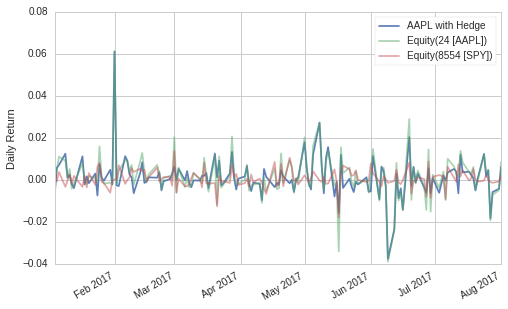

In [26]:
# Plot the returns of the portfolio as well as the asset by itself
portfolio.plot(alpha=0.9,label='AAPL with Hedge', figsize=(8,5))
asset_ret2017.plot(alpha=0.5);
benchmark_ret2017.plot(alpha=0.5)
plt.ylabel("Daily Return")
plt.legend();

In [27]:
portfolio.mean()

0.0011399935632582228

In [28]:
asset_ret2017.mean()

0.0018808609159293456

In [29]:
portfolio.std()

0.009066375411652783

In [30]:
asset_ret2017.std()

0.010484461271996029

Even with $\beta$ obtained with previous data, the hedged portfolio $\beta$ is significantly reduced but not eliminated. The std reduced a bit, but the average return reduced significantly as well! (My understanding is that means the AAPL is not much better than SPY)

<font color='red'>Lecturer words in notebook: What are the actual effects? Typically sacrificing average returns for less volatility, but this is also highly dependent on the security.</font>
<p><font color='red'>Lecturer words in slides: ... show a simple method of hedging against the $\beta$, in an attempt to cancel out any risk exposure to the market.</font></p>
<font color='red'>One possible strategy to use the analysis is, according to discussions on the Q&A, to short SPY for AAPL or long SPY with AAPL, according to stock $\beta$. It is also said that there is no correct answer to which is a good strategy. So it is more about method than strategy </fond> 

# PyFolio Portfolio Analysis

In [31]:
import pyfolio as pf
import empyrical

## Set A Benchmark Algo for SPY

In [32]:
# saved in algorithm file, "Benchmark SPY". Run Full Backtest -> Backtest 2.
def initialize(context):
    context.spy = sid(8554)
    
    set_max_leverage(1.01)
    
    schedule_function(rebalance, date_rules.every_day(), time_rules.market_open())
    
def rebalance(context, data):
    order_target_percent(context.spy, 1.0)

In [33]:
# click the 'notebook' tab, copy command of loading the test result, and assignn it to 'benchmark_rets':
benchmark_rets = get_backtest('5ba7ee0c9fe15f43af2dc2d3')

100% Time: 0:00:00|###########################################################|


In [34]:
bm_returns = benchmark_rets.daily_performance['returns']
bm_positions = benchmark_rets.pyfolio_positions
bm_transactions = benchmark_rets.pyfolio_transactions

## reload the previous portfolio amazon+0.5/imb-0.5 full backtest result

In [35]:
bt = get_backtest('5b9fdb55a9558143e9363c22')

100% Time: 0:00:00|###########################################################|


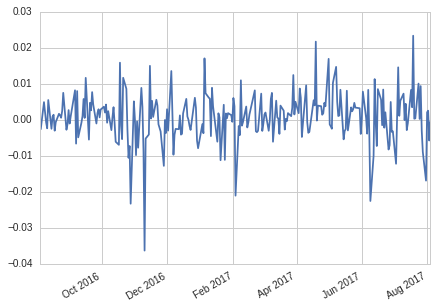

In [36]:
bt_returns = bt.daily_performance['returns']
bt_positions = bt.pyfolio_positions
bt_transactions = bt.pyfolio_transactions
bt_returns.plot(figsize=(7,5));

In [37]:
print(empyrical.beta(bt_returns,bm_returns))
print(empyrical.beta(bm_returns, bt_returns))
print(bt_returns.sum())
print(bm_returns.sum())

0.144435083257
0.0805223397765
0.183267063284
0.153138312609


<font color='red'>##### Once again, (1) empyrical.beta(bt_returns,bm_returns) and empyrical.beta(bm_returns,be_returns) are not reciprocal; (2) even the total return of bt_returns is higher than bm_returns, the empyrical.beta(bm_returns,bt_returns) is not greater than 1. This confirms that using daily returns to fitting the $\beta$ for CAPM theory will never work.</font>

# PyFolio Plots

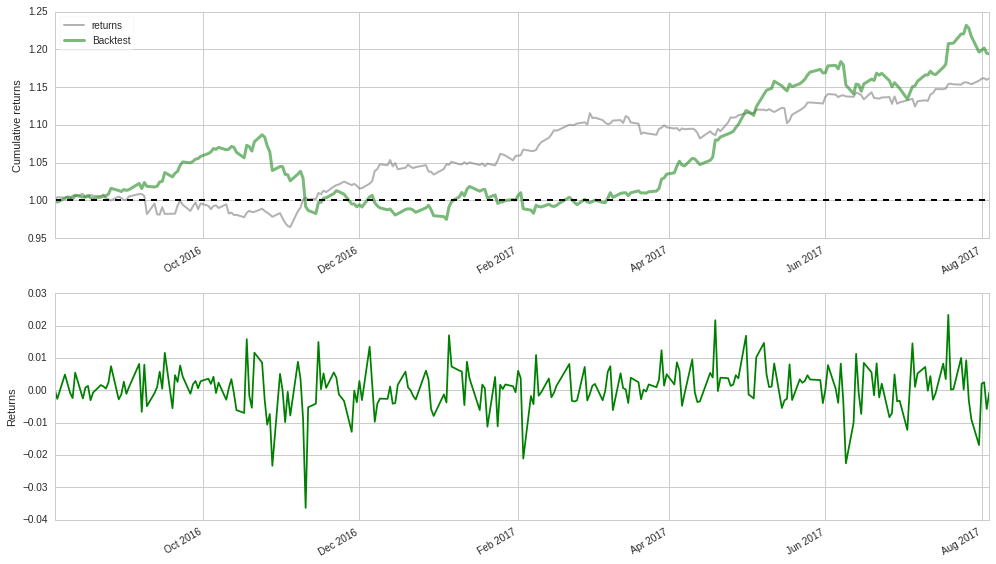

In [38]:
# Cumulative Returns
plt.subplot(2,1,1)
pf.plotting.plot_rolling_returns(bt_returns, bm_returns)

# Daily, Non-Cumulative Returns
plt.subplot(2,1,2)
pf.plotting.plot_returns(bt_returns)
plt.tight_layout()

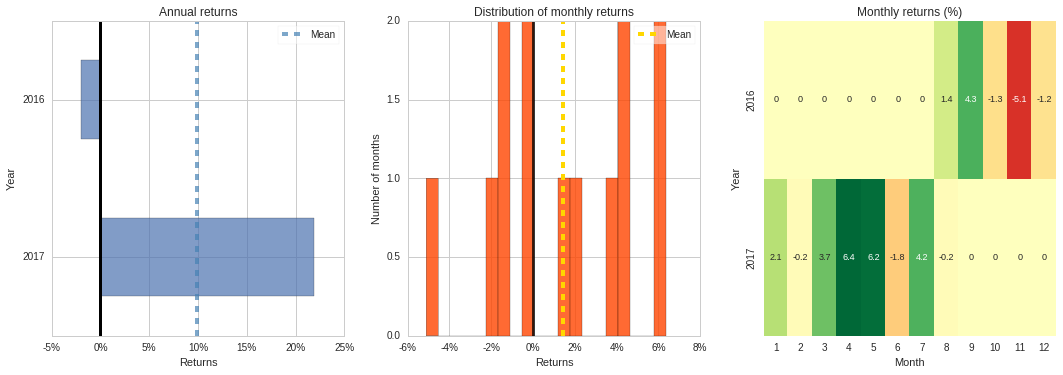

In [39]:
fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(15,5)

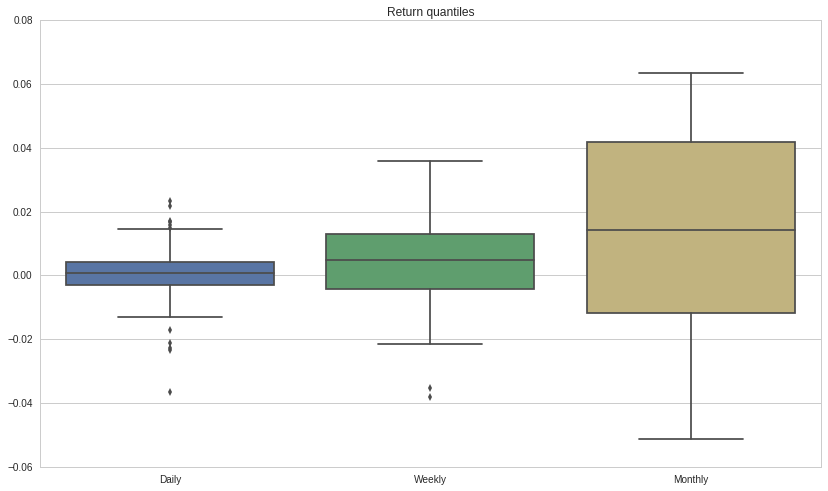

In [40]:
pf.plot_return_quantiles(bt_returns);

(-0.15, 0.25)

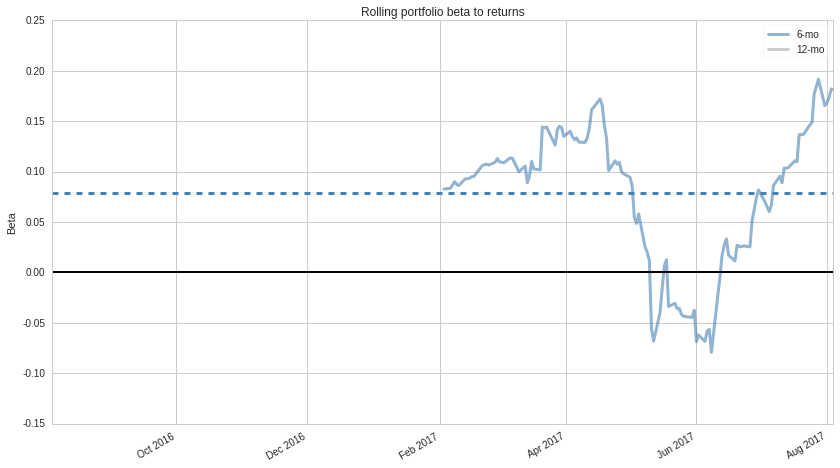

In [41]:
pf.plot_rolling_beta(bt_returns, bm_returns)
plt.ylim(-0.15, 0.25)

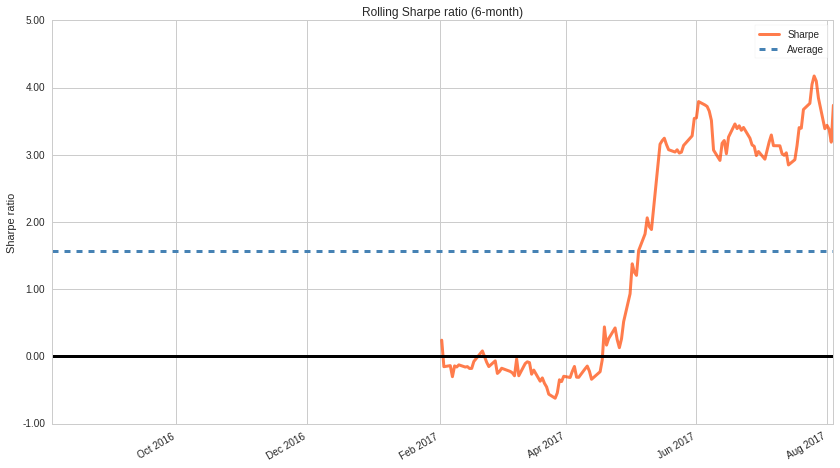

In [42]:
pf.plot_rolling_sharpe(bt_returns);

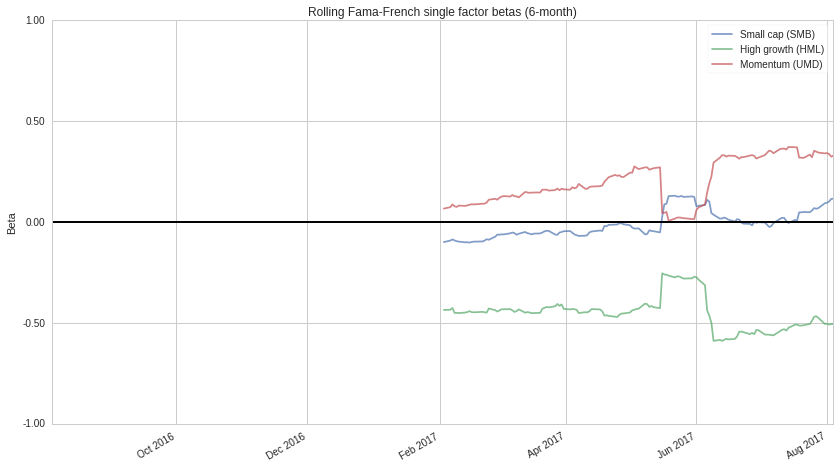

In [43]:
pf.plot_rolling_fama_french(bt_returns);

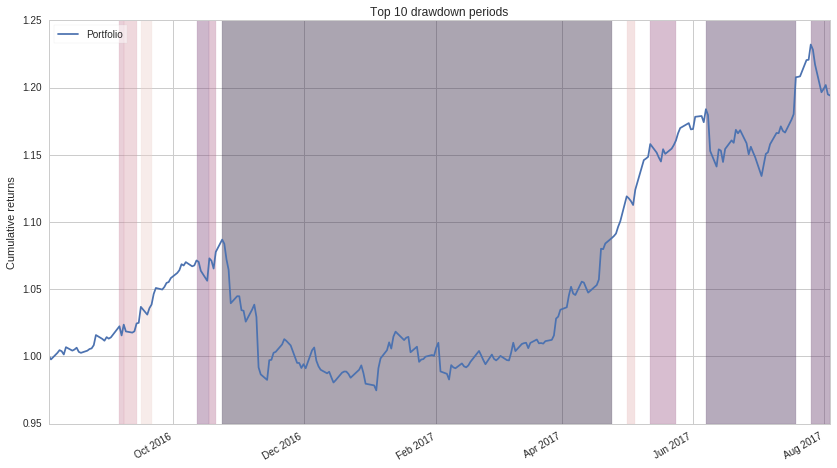

In [44]:
pf.plot_drawdown_periods(bt_returns);

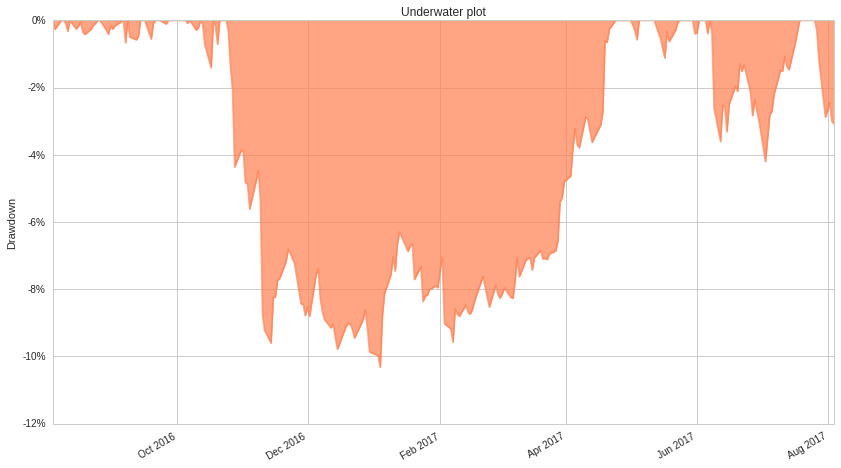

In [45]:
pf.plot_drawdown_underwater(bt_returns);

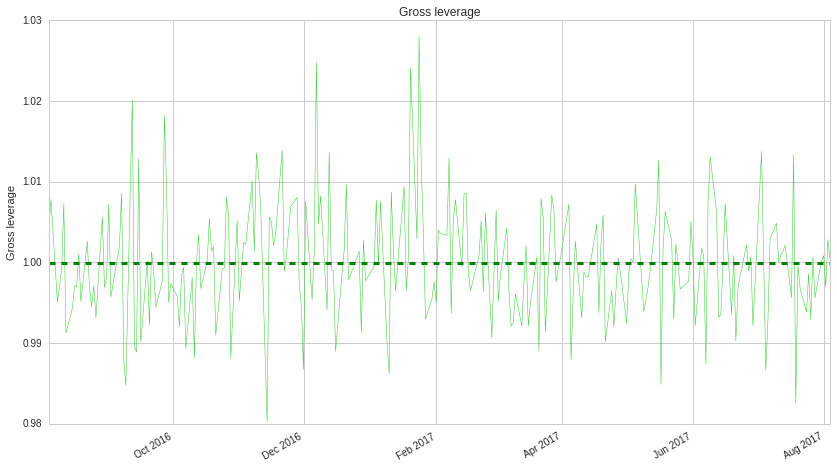

In [46]:
pf.plot_gross_leverage(bt_returns, bt_positions);

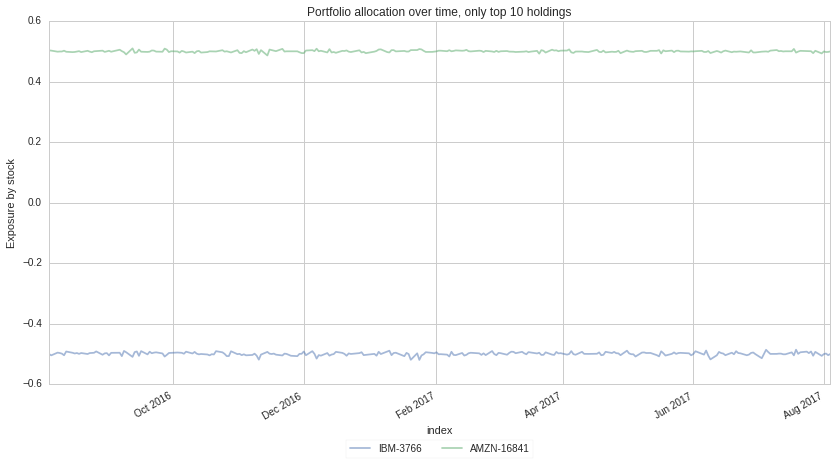

In [47]:
pos_percent = pf.pos.get_percent_alloc(bt_positions)
pf.plotting.show_and_plot_top_positions(bt_returns, pos_percent);

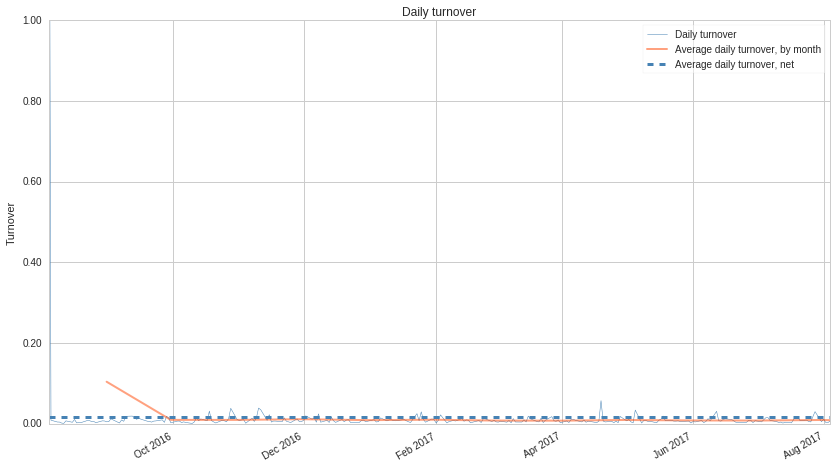

In [48]:
pf.plot_turnover(bt_returns, bt_transactions, bt_positions);

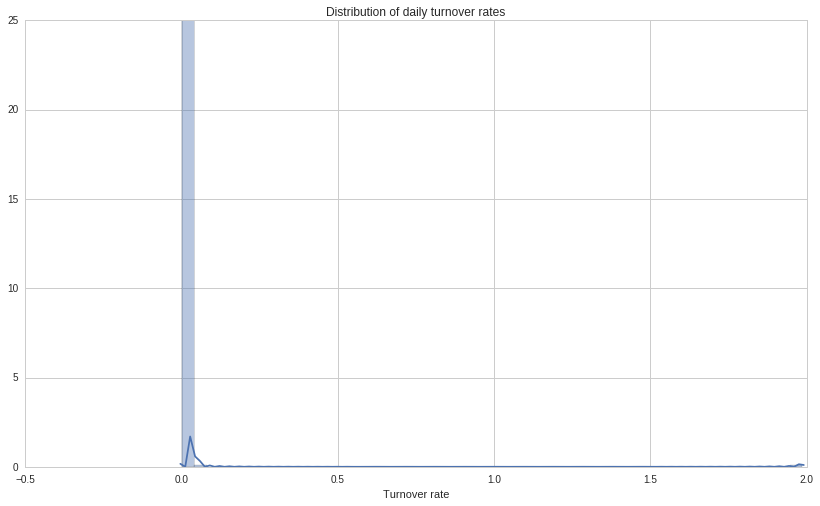

In [49]:
pf.plotting.plot_daily_turnover_hist(bt_transactions, bt_positions);

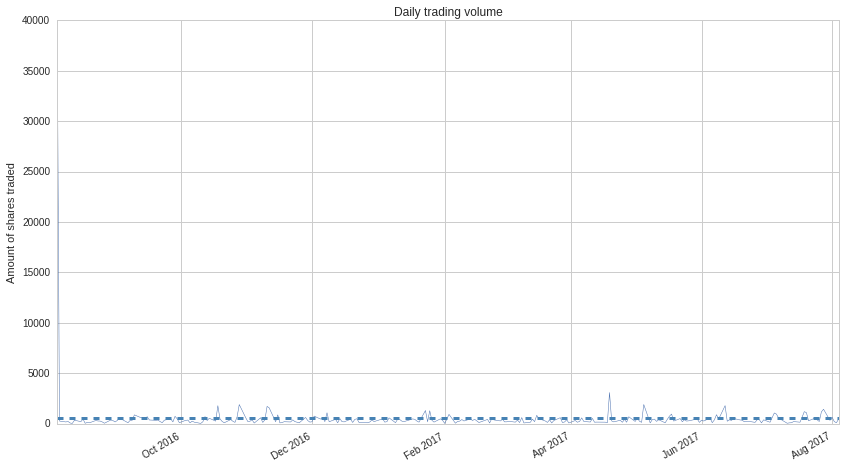

In [50]:
pf.plotting.plot_daily_volume(bt_returns, bt_transactions);

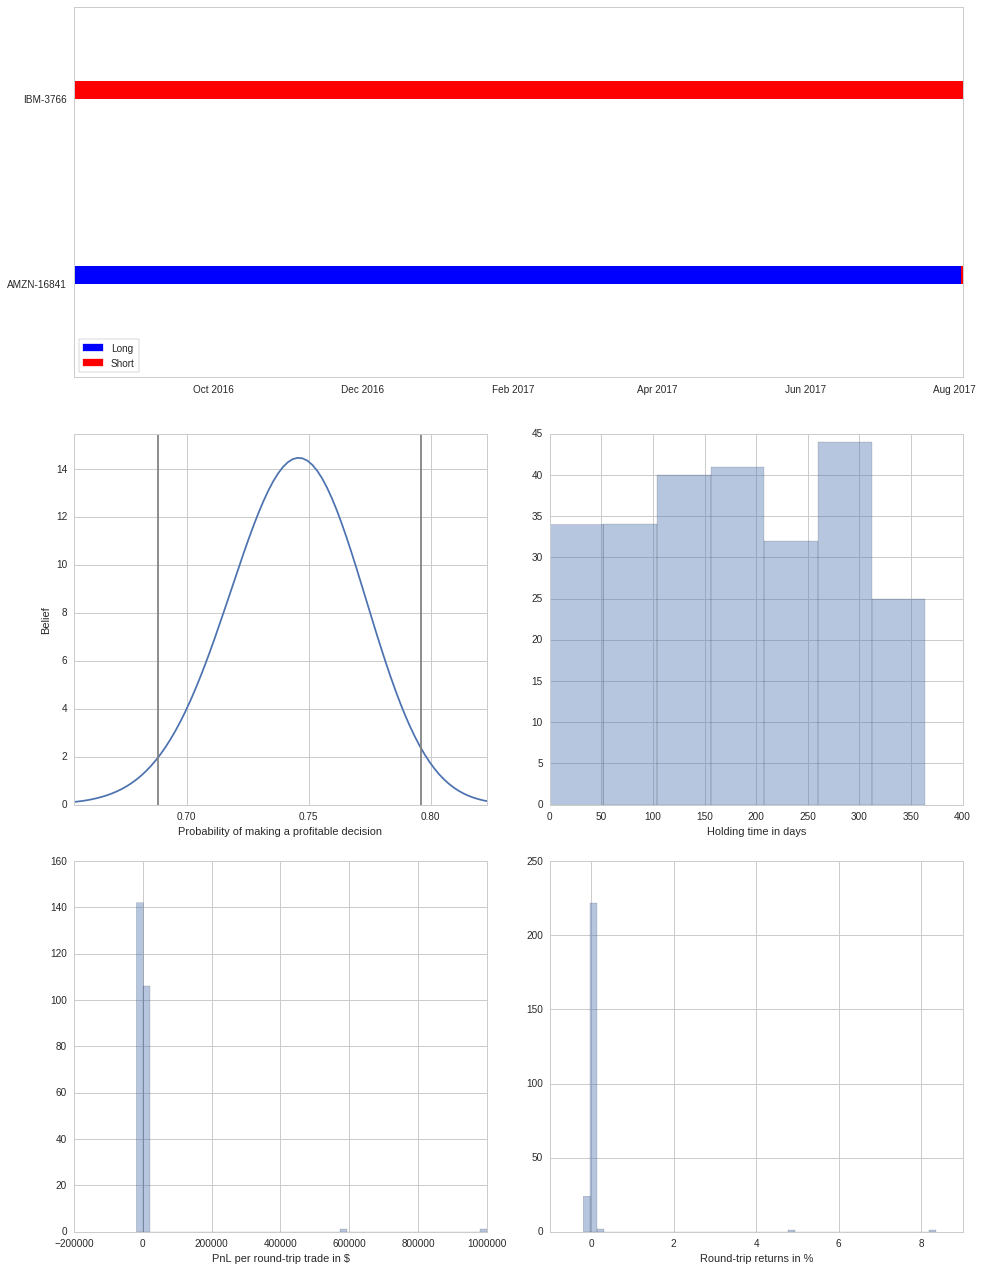

In [51]:
pf.create_round_trip_tear_sheet(bt_returns, bt_positions, bt_transactions);